### Tải GloVe embeddings và cài đặt một thư viện

In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [ ]:
# Tải GloVe từ địa chỉ chính thức (nếu chưa có)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-10-09 13:05:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-10-09 13:05:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-10-09 13:05:10--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

### Chuyển đổi và nạp mô hình GloVe

In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Chuyển file glove.6B.100d.txt sang định dạng word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

# Nạp mô hình
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/tmp/ipython-input-876762530.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


### **Trực quan hóa bằng PCA và t-SNE xuống còn 2 chiều**


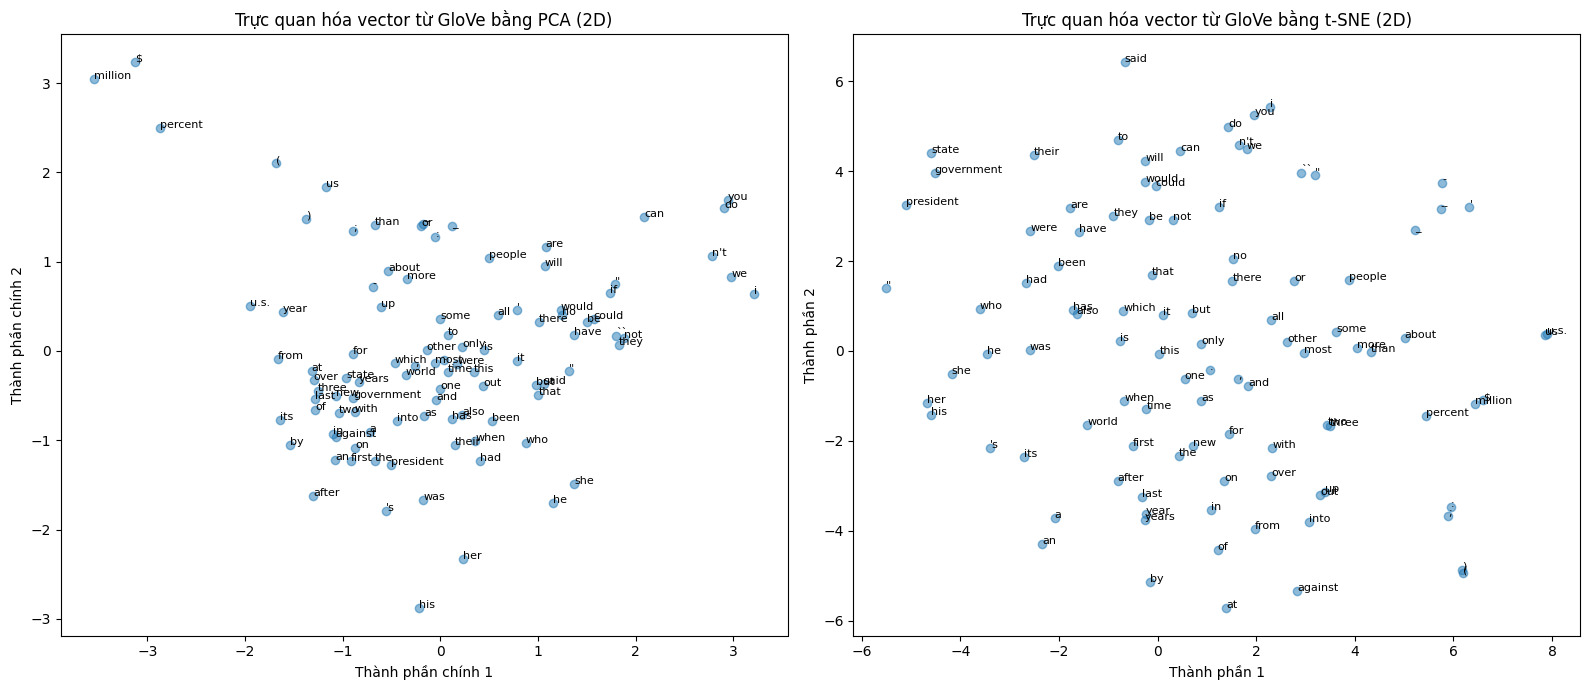

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import random

# Lấy 100 từ đầu tiên
words = list(model.key_to_index.keys())[:100]
vectors = np.array([model[word] for word in words])

# Giảm chiều bằng PCA (2D)
pca_2 = PCA(n_components=2)
pca_vecs_2 = pca_2.fit_transform(vectors)

# Giảm chiều bằng t-SNE (2D)
tsne_2 = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_vecs_2 = tsne_2.fit_transform(vectors)

# Vẽ hai biểu đồ song song
plt.figure(figsize=(16, 7))

# Biểu đồ PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_vecs_2[:, 0], pca_vecs_2[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.text(pca_vecs_2[i, 0], pca_vecs_2[i, 1], word, fontsize=8)
plt.title("Trực quan hóa vector từ GloVe bằng PCA (2D)")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")

# Biểu đồ t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_vecs_2[:, 0], tsne_vecs_2[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.text(tsne_vecs_2[i, 0], tsne_vecs_2[i, 1], word, fontsize=8)
plt.title("Trực quan hóa vector từ GloVe bằng t-SNE (2D)")
plt.xlabel("Thành phần 1")
plt.ylabel("Thành phần 2")

plt.tight_layout()
plt.show()


**Bình luận và Đánh giá:**

*   PCA (hình trái) cho thấy các điểm phân bố tương đối tập trung, không hình thành cụm rõ ràng. Các từ có tần suất xuất hiện cao hoặc mang tính ngữ pháp (như the, of, and, to, is) thường nằm gần nhau, phản ánh bản chất tuyến tính của PCA.
*   t-SNE (hình phải) cho thấy các điểm tách biệt hơn, tạo ra nhiều cụm nhỏ. Một số nhóm từ có thể được gom lại gần nhau do có ngữ nghĩa tương tự (ví dụ: president – government – state hoặc percent – million). Điều này chứng tỏ t-SNE giữ được mối quan hệ ngữ nghĩa cục bộ tốt hơn.

-> PCA giúp hình dung cấu trúc toàn cục, trong khi t-SNE cho thấy các quan hệ ngữ nghĩa chi tiết hơn giữa các từ.

# **Trực quan hóa bằng PCA và t-SNE xuống còn 3 chiều**

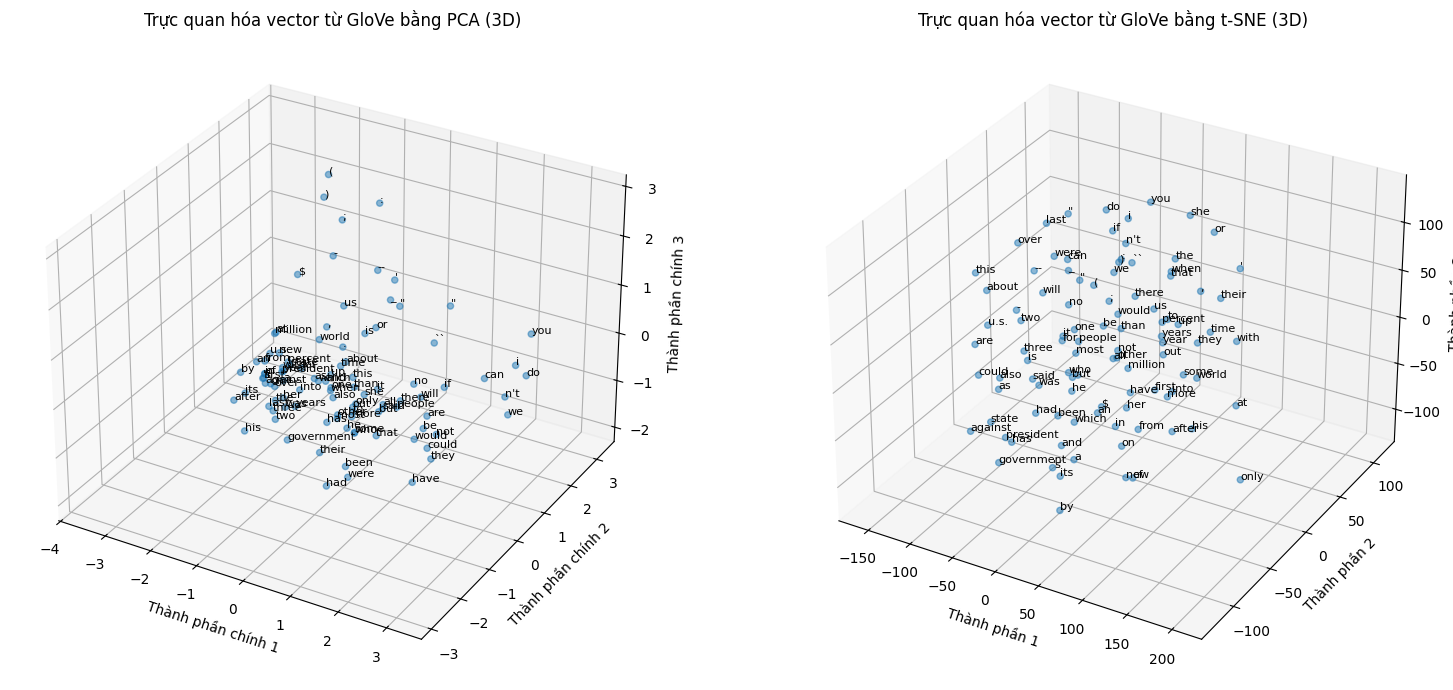

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Lấy 100 từ đầu tiên
words = list(model.key_to_index.keys())[:100]
vectors = np.array([model[word] for word in words])

# Giảm chiều bằng PCA (3D)
pca_3 = PCA(n_components=3)
pca_vecs_3 = pca_3.fit_transform(vectors)

# Giảm chiều bằng t-SNE (3D)
tsne_3 = TSNE(n_components=3, random_state=42, perplexity=30, max_iter=1000)
tsne_vecs_3 = tsne_3.fit_transform(vectors)

# Vẽ hai biểu đồ song song (3D)
fig = plt.figure(figsize=(16, 7))

# --- PCA 3D ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(pca_vecs_3[:, 0], pca_vecs_3[:, 1], pca_vecs_3[:, 2], alpha=0.5)
for i, word in enumerate(words):
    ax1.text(pca_vecs_3[i, 0], pca_vecs_3[i, 1], pca_vecs_3[i, 2], word, fontsize=8)
ax1.set_title("Trực quan hóa vector từ GloVe bằng PCA (3D)")
ax1.set_xlabel("Thành phần chính 1")
ax1.set_ylabel("Thành phần chính 2")
ax1.set_zlabel("Thành phần chính 3")

# --- t-SNE 3D ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(tsne_vecs_3[:, 0], tsne_vecs_3[:, 1], tsne_vecs_3[:, 2], alpha=0.5)
for i, word in enumerate(words):
    ax2.text(tsne_vecs_3[i, 0], tsne_vecs_3[i, 1], tsne_vecs_3[i, 2], word, fontsize=8)
ax2.set_title("Trực quan hóa vector từ GloVe bằng t-SNE (3D)")
ax2.set_xlabel("Thành phần 1")
ax2.set_ylabel("Thành phần 2")
ax2.set_zlabel("Thành phần 3")

plt.tight_layout()
plt.show()


**Bình luận và Đánh giá:**

*   PCA (hình trái) các điểm được phân bố khá gần nhau, tập trung thành một vùng chính. Điều này cho thấy PCA giữ được cấu trúc tổng thể nhưng không thể hiện rõ các cụm ngữ nghĩa riêng biệt. Những từ có tần suất cao hoặc mang nghĩa ngữ pháp (the, of, and, to, is) vẫn xuất hiện gần nhau, đúng như đặc tính của PCA.
*   t-SNE (hình phải) phân bố của các điểm rời rạc và có xu hướng tạo thành nhiều cụm nhỏ hơn. Một số cụm phản ánh mối quan hệ ngữ nghĩa khá tự nhiên — ví dụ: nhóm từ liên quan đến chính trị (president, government, state), nhóm về số lượng (million, percent), hoặc nhóm động từ (be, is, was, been). t-SNE giúp bộc lộ rõ hơn các quan hệ ngữ nghĩa cục bộ giữa các từ mà PCA không thể hiện được.

-> Kết quả cho thấy cả hai phương pháp đều có giá trị riêng, PCA cho cái nhìn tổng quan, t-SNE cho cái nhìn chi tiết hơn về cấu trúc ngữ nghĩa.

# **Top K vector tương đồng nhất với một từ**

In [ ]:
word = "king"
k = int(input())
topk = model.most_similar(word, topn=k)
for similar_word, score in topk:
    print(f"{similar_word}: {score:.4f}")

20
prince: 0.7682
queen: 0.7508
son: 0.7021
brother: 0.6986
monarch: 0.6978
throne: 0.6920
kingdom: 0.6811
father: 0.6802
emperor: 0.6713
ii: 0.6676
crown: 0.6648
reign: 0.6630
uncle: 0.6608
henry: 0.6578
ruler: 0.6539
iii: 0.6498
nephew: 0.6485
edward: 0.6482
charles: 0.6415
george: 0.6374


**Bình luận và Đánh giá:**


*   Kết quả cho thấy các từ có độ tương đồng cao với từ "king" chủ yếu thuộc cùng trường ngữ nghĩa hoàng gia – gia đình – quyền lực như prince, queen, monarch, throne, crown, ruler, hoặc kingdom.
*   Ngoài ra, sự xuất hiện của các tên riêng như Henry, Edward, Charles, George cũng phản ánh rằng mô hình nắm bắt được các liên hệ thực tế giữa các danh xưng và nhân vật lịch sử thường đi kèm với từ king trong tập dữ liệu huấn luyện.

-> Điều này chứng tỏ mô hình GloVe đã học được tốt các quan hệ ngữ nghĩa và ngữ cảnh, đặc biệt là mối liên hệ giữa các vai trò hoàng tộc và cấu trúc quyền lực.
